In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Load the Data**

In [ ]:
CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
temp_by_city = pd.read_csv('/content/drive/MyDrive/GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('/content/drive/MyDrive/TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('/content/drive/MyDrive/TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('/content/drive/MyDrive/TemperaturesByState.csv')
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')

# **Data Inspection**

In [ ]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [ ]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
temp_by_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# **Exploratory Data Analysis and Data pre-processing**

In [ ]:
# Dropping all NaN values
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

In [ ]:
# Modify the date format so I could only use the year
def to_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)


# Applying the date modification and creating a new column
# in the dataset called year
temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

# Collecting only data of the United States
dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year
dfa = pd.DataFrame()
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa = pd.concat([dfa, df_new], ignore_index=True)

<Axes: xlabel='year', ylabel='AverageTemperature'>

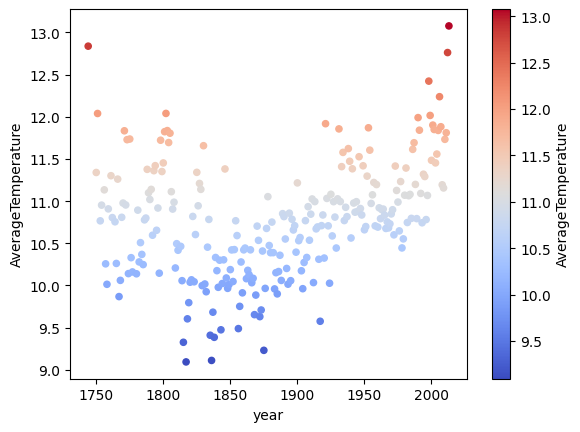

In [ ]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

<Axes: xlabel='year', ylabel='AverageTemperature'>

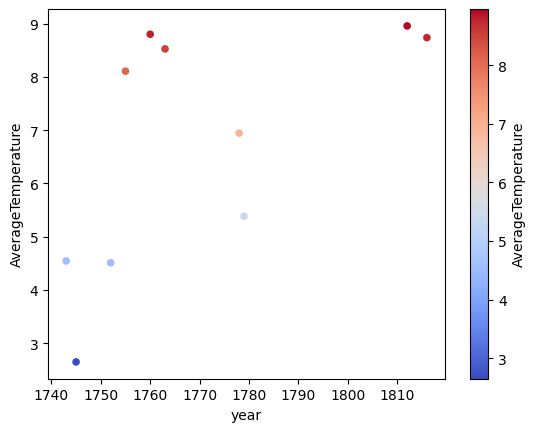

In [ ]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

In [ ]:
new_co2_df = CO2_df

In [ ]:
dfc = pd.DataFrame()

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['Year'] == i]).head(1)
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = pd.concat([dfc, df_new], ignore_index=True)

# Changing the Year column to year (lowercase)
dfc.rename(index=str, columns={"Year": "year"}, inplace=True)


# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)',
           'Carbon Dioxide Fit (ppm)',
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

In [ ]:
dfc = dfc.dropna()

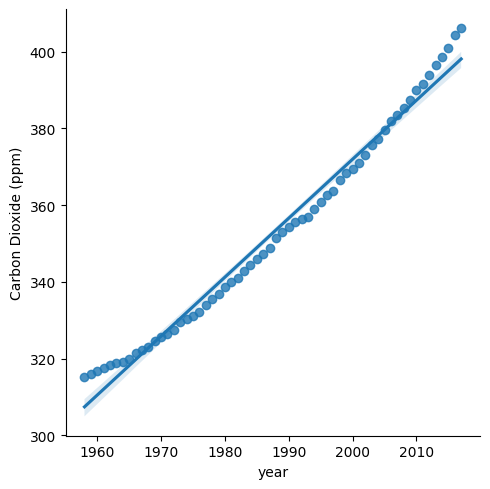

In [ ]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc)

<Axes: >

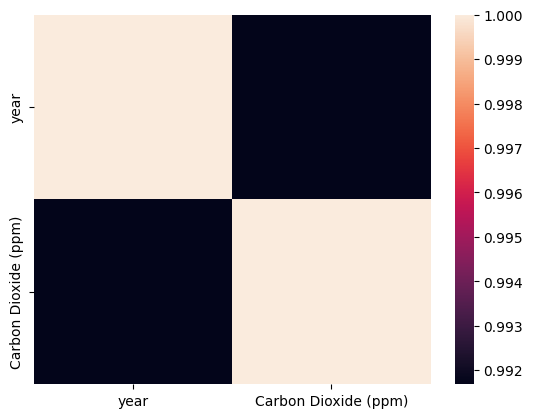

In [ ]:
sns.heatmap(dfc.corr())

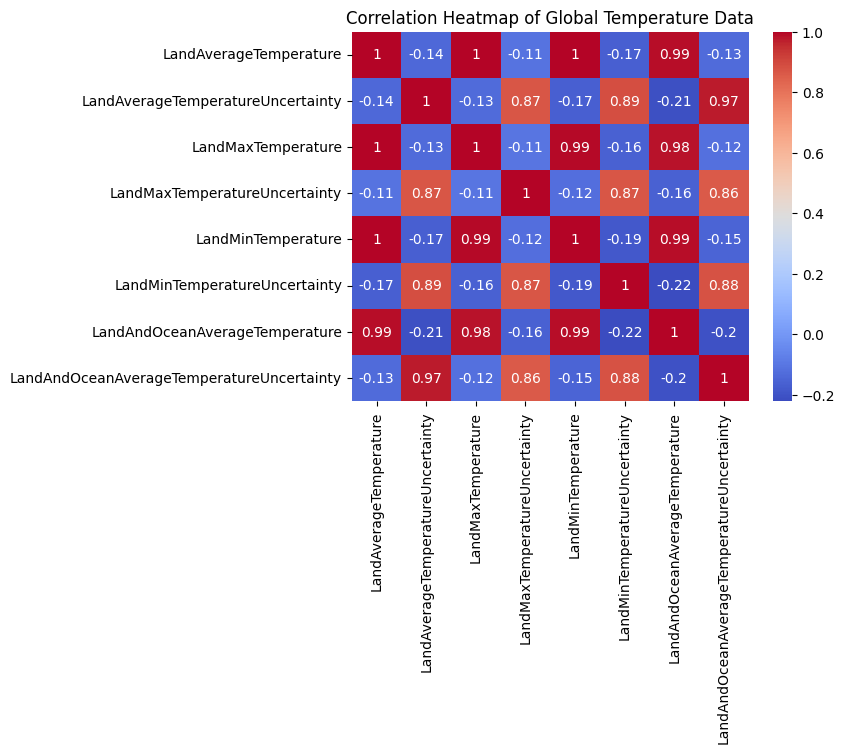

In [ ]:
# Only keep numeric columns for correlation
numeric_cols = global_temp.select_dtypes(include='number')

# Now generate the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Global Temperature Data")
plt.show()

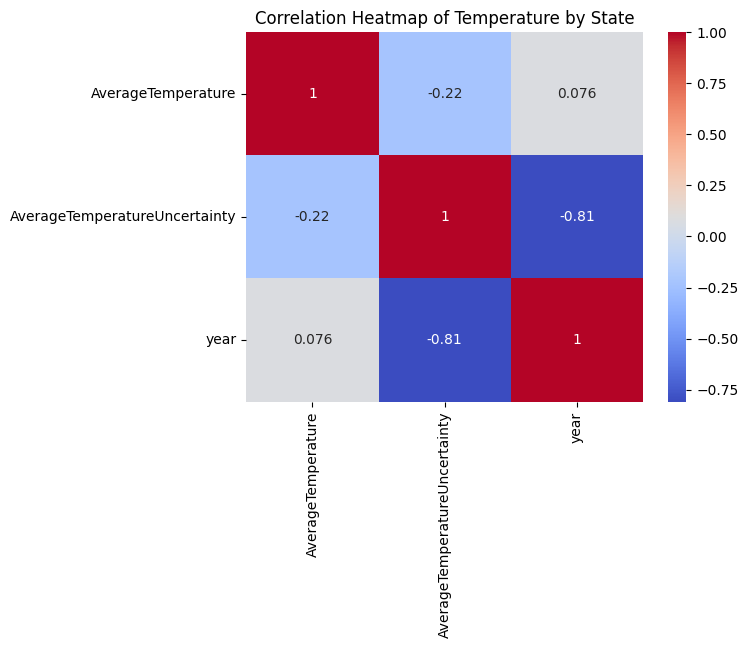

In [ ]:
# Keep only numeric columns
numeric_cols = temp_by_state.select_dtypes(include='number')

# Create the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Temperature by State")
plt.show()

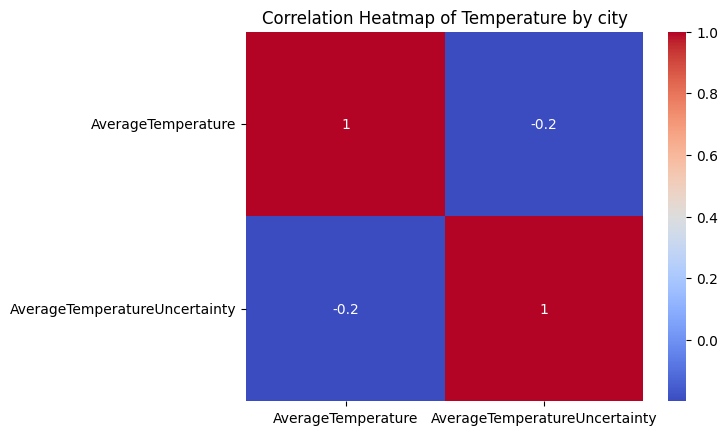

In [ ]:
# Keep only numeric columns
numeric_cols = temp_by_major_city.select_dtypes(include='number')

# Create the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Temperature by city")
plt.show()

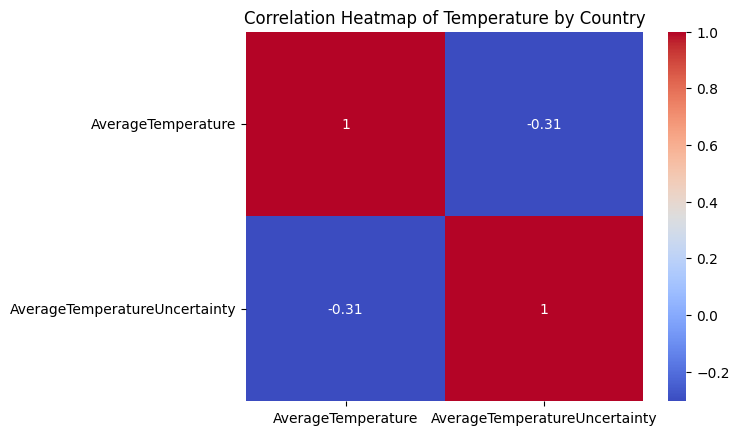

In [ ]:
# Keep only numeric columns
numeric_cols = temp_by_country.select_dtypes(include='number')

# Create the heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Temperature by Country")
plt.show()

In [ ]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

In [ ]:
dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)',
           'Carbon Dioxide Fit (ppm)',
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

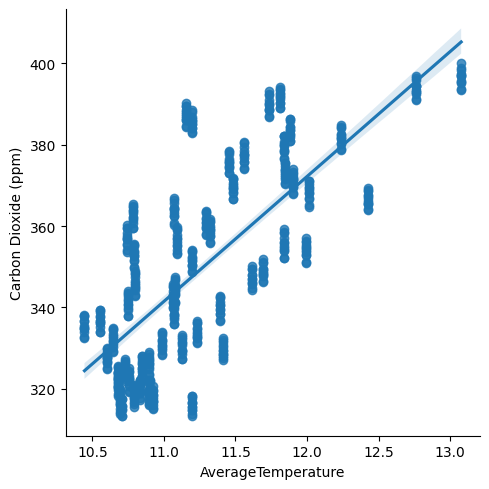

In [ ]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc)

# **Task: Predicting Future co2 concentration levels**

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

In [ ]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

In [ ]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="EWM average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

In [ ]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ]

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  0.996044541845813


In [ ]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])

# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

In [ ]:
# State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

,116037
dt,2012-06-01
AverageTemperature,36.339
AverageTemperatureUncertainty,0.385
State,Delhi
Country,India
year,2012


In [ ]:
# Country that had the highest Average Temperature
# Kuwait (Western Asia)
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

,284851
dt,2012-07-01
AverageTemperature,38.842
AverageTemperatureUncertainty,0.464
Country,Kuwait


In [ ]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

,202908
dt,1768-01-01
AverageTemperature,-9.102
AverageTemperatureUncertainty,12.646
State,Kaliningrad
Country,Russia
year,1768


In [ ]:
def mod_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)

In [ ]:
def mod_month(date):
    """
    returns month from date time
    """
    for i in [date]:
        second = i.split('-')[1]
        return int(second)

In [ ]:
temp_by_country['year'] = temp_by_country['dt'].apply(mod_year)
temp_by_country['month'] = temp_by_country['dt'].apply(mod_month)

In [ ]:
country_new_temp_data = pd.merge(temp_by_country, CO2_df, on=['year'])

In [ ]:
# Group and calculate mean
country_carbon = country_new_temp_data.groupby(["year", "month"]).mean(numeric_only=True)["Carbon Dioxide (ppm)"]

# Build datetime x-axis
xx = [dt.datetime(year=year, month=month, day=15) for year, month in country_carbon.index]

# Mean values
yy1 = country_carbon.values

# Rolling average (3-month window)
yy2 = country_carbon.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
yy3 = country_carbon.ewm(span=3, min_periods=1).mean().values

In [ ]:
second_country_trace = go.Scatter(x=xx, y=yy1, mode="markers", name="Actual value")
third_country_trace = go.Scatter(x=xx, y=yy2, line=dict(color="red"), name="Rolling average")
forth_country_trace = go.Scatter(x=xx, y=yy3, line=dict(color="green"), name="EWM average")

In [ ]:
x_values = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_values = [ i for i in y1 ]

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_values)

Accuracy:  0.996044541845813


In [ ]:
# country_new_temp_data['Country'].unique()
df1 = country_new_temp_data.groupby(['Country'])

In [ ]:
df2= df1.apply(lambda x: x.sort_values(["Carbon Dioxide (ppm)"]),include_groups=False)

In [ ]:
df3=df2.reset_index(drop=True)
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,year,month,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-11-01,5.400,0.678,1958,11,9,1958.7068,313.21,316.06,312.48,315.35
1,1958-12-01,4.662,0.439,1958,12,9,1958.7068,313.21,316.06,312.48,315.35
2,1958-08-01,24.639,0.436,1958,8,9,1958.7068,313.21,316.06,312.48,315.35
3,1958-09-01,21.086,0.463,1958,9,9,1958.7068,313.21,316.06,312.48,315.35
4,1958-04-01,16.592,0.350,1958,4,9,1958.7068,313.21,316.06,312.48,315.35


In [ ]:
new_predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        new_predicted_x.append([y, j, j ** 2, y ** 2])

# Predict values
new_predicted_y = linearModel.predict(new_predicted_x)


new_x_plot = [dt.datetime(i[0], i[1], 15) for i in new_predicted_x]
fifth_new_trace = go.Scatter(x=new_x_plot , y=new_predicted_y, line=dict(color="red"), name="Predicted value")

layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_country_trace, fifth_new_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

# **Task: Predicting Future Temperature Anamolies**

R-squared on the test set (with CO2 Polynomial Degree 2): 0.8210900367396553


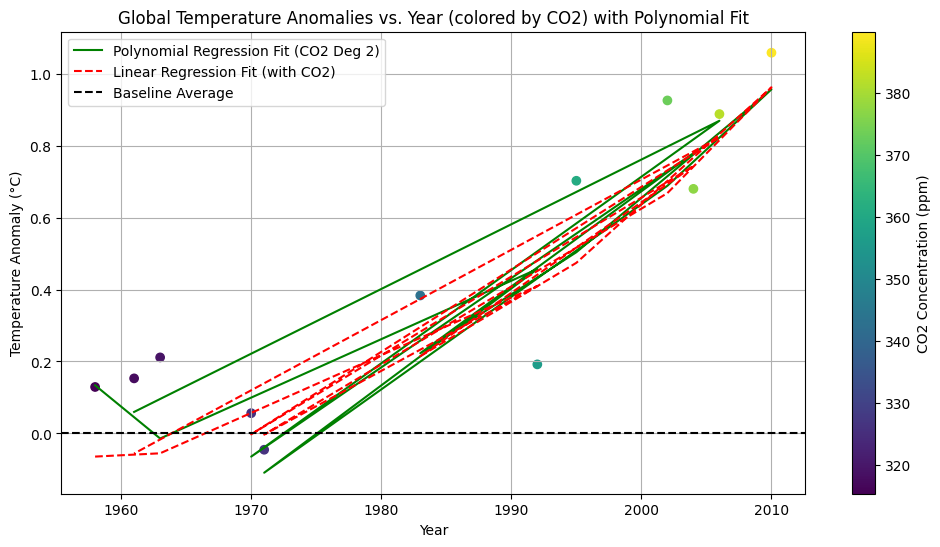

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare the merged DataFrame
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace=True)
global_temp.dropna(subset=['LandAverageTemperature'], inplace=True)
global_temp['Year'] = global_temp.index.year
baseline_start_year = 1901
baseline_end_year = 2000
baseline_temp = global_temp.loc[f'{baseline_start_year}-01-01':f'{baseline_end_year}-12-31']['LandAverageTemperature'].mean()
yearly_avg_temp = global_temp.groupby('Year')['LandAverageTemperature'].mean()
anomalies = yearly_avg_temp - baseline_temp
anomalies_df = pd.DataFrame({'Year': anomalies.index, 'TemperatureAnomaly': anomalies.values})

CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)
dfc_list = []
years_co2 = CO2_df['year'].unique()
for i in years_co2:
    df_avg = CO2_df[CO2_df['year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['year'] == i]).head(1).copy()
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc_list.append(df_new)
dfc = pd.concat(dfc_list, ignore_index=True)
dfc.rename(index=str, columns={"year": "Year"}, inplace=True)
dfc.drop(['Seasonally Adjusted CO2 (ppm)',
           'Carbon Dioxide Fit (ppm)',
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1, errors='ignore')
dfc = dfc.dropna()

merged_df = pd.merge(anomalies_df, dfc[['Year', 'Carbon Dioxide (ppm)']], on='Year', how='inner')
merged_df = merged_df.dropna()

# Prepare features (Year, CO2) and target (Anomaly)
X = merged_df[['Year', 'Carbon Dioxide (ppm)']]
y = merged_df['TemperatureAnomaly']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features to 'Carbon Dioxide (ppm)'
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['Carbon Dioxide (ppm)']])
X_test_poly = poly.transform(X_test[['Carbon Dioxide (ppm)']])

# Combine with the 'Year' feature
X_train_poly_full = np.concatenate([X_train['Year'].values.reshape(-1, 1), X_train_poly], axis=1)
X_test_poly_full = np.concatenate([X_test['Year'].values.reshape(-1, 1), X_test_poly], axis=1)

# Train a Linear Regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly_full, y_train)

# Make predictions
predictions_poly = model_poly.predict(X_test_poly_full)

# Evaluate the model
r_squared_poly = r2_score(y_test, predictions_poly)
print(f"R-squared on the test set (with CO2 Polynomial Degree 2): {r_squared_poly}")

# Visualization
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_test['Year'], y_test, c=X_test['Carbon Dioxide (ppm)'], cmap='viridis')
plt.plot(X_test['Year'], predictions_poly, color='green', label='Polynomial Regression Fit (CO2 Deg 2)')
plt.plot(X_test['Year'], model_co2.predict(X_test), color='red', linestyle='--', label='Linear Regression Fit (with CO2)') # Previous linear model
plt.axhline(0, color='black', linestyle='--', label='Baseline Average')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies vs. Year (colored by CO2) with Polynomial Fit')
plt.colorbar(scatter, label='CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

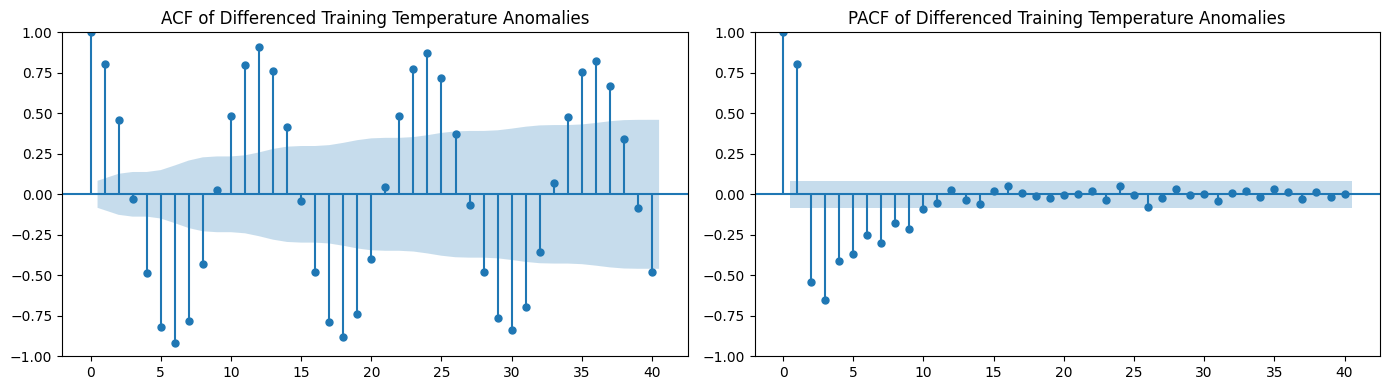

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load and prepare the merged monthly data
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace=True)
global_temp.dropna(subset=['LandAverageTemperature'], inplace=True)
baseline_start_year = 1901
baseline_end_year = 2000
baseline_temp = global_temp.loc[f'{baseline_start_year}-01-01':f'{baseline_end_year}-12-31']['LandAverageTemperature'].mean()
monthly_anomalies = global_temp['LandAverageTemperature'] - baseline_temp
monthly_anomalies = monthly_anomalies.dropna()

CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
CO2_df['YearMonth'] = pd.to_datetime(CO2_df['Year'].astype(str) + '-' + CO2_df['Month'].astype(str), format='%Y-%m')
CO2_df.set_index('YearMonth', inplace=True)
monthly_co2 = CO2_df['Carbon Dioxide (ppm)'].dropna()

merged_monthly = pd.merge(monthly_anomalies, monthly_co2, left_index=True, right_index=True, how='inner')
merged_monthly = merged_monthly.dropna()
merged_monthly.rename(columns={'LandAverageTemperature': 'TemperatureAnomaly', 'Carbon Dioxide (ppm)': 'CO2'}, inplace=True)

# Split the data into training and testing sets (chronologically)
train_size = int(len(merged_monthly) * 0.8)
train_data = merged_monthly[:train_size]
test_data = merged_monthly[train_size:]

# Difference the training temperature anomaly series
train_diff = train_data['TemperatureAnomaly'].diff().dropna()

# Plot ACF and PACF of the differenced training data
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(train_diff, lags=40, ax=axes[0], title='ACF of Differenced Training Temperature Anomalies')
plot_pacf(train_diff, lags=40, ax=axes[1], title='PACF of Differenced Training Temperature Anomalies')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



SARIMAX((1, 1, 1))(1, 1, 1, 12) RMSE: 0.44836467197105573


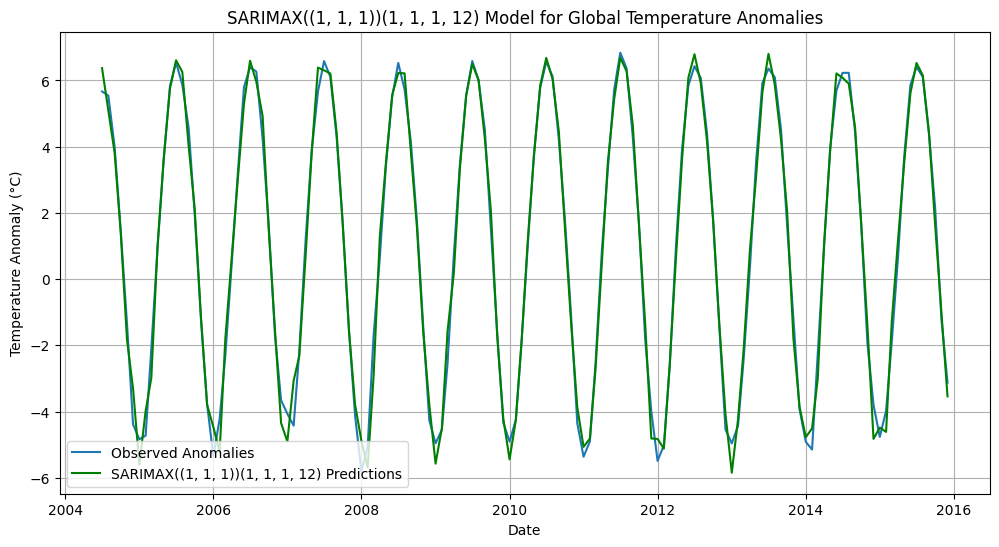

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load and prepare the merged monthly data (as in the previous ARIMAX step)
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace=True)
global_temp.dropna(subset=['LandAverageTemperature'], inplace=True)
baseline_start_year = 1901
baseline_end_year = 2000
baseline_temp = global_temp.loc[f'{baseline_start_year}-01-01':f'{baseline_end_year}-12-31']['LandAverageTemperature'].mean()
monthly_anomalies = global_temp['LandAverageTemperature'] - baseline_temp
monthly_anomalies = monthly_anomalies.dropna()

CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
CO2_df['YearMonth'] = pd.to_datetime(CO2_df['Year'].astype(str) + '-' + CO2_df['Month'].astype(str), format='%Y-%m')
CO2_df.set_index('YearMonth', inplace=True)
monthly_co2 = CO2_df['Carbon Dioxide (ppm)'].dropna()

merged_monthly = pd.merge(monthly_anomalies, monthly_co2, left_index=True, right_index=True, how='inner')
merged_monthly = merged_monthly.dropna()
merged_monthly.rename(columns={'LandAverageTemperature': 'TemperatureAnomaly', 'Carbon Dioxide (ppm)': 'CO2'}, inplace=True)

# Split the data into training and testing sets (chronologically)
train_size = int(len(merged_monthly) * 0.8)
train_data = merged_monthly[:train_size]
test_data = merged_monthly[train_size:]

# Prepare exogenous variable (CO2) for SARIMAX
train_exog = train_data['CO2'].values
test_exog = test_data['CO2'].values
history = [x for x in train_data['TemperatureAnomaly'].values]
exog_history = [x for x in train_exog]
predictions_sarimax = []

# Define the order for SARIMAX(p, d, q)(P, D, Q, s)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Train and predict (rolling forecast) with SARIMAX
for i in range(len(test_data)):
    model = SARIMAX(history, exog=exog_history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False) # disp=False to suppress convergence messages
    output = model_fit.forecast(steps=1, exog=[test_exog[i]])[0]
    predictions_sarimax.append(output)
    history.append(test_data['TemperatureAnomaly'].values[i])
    exog_history.append(test_exog[i])

# Evaluate the SARIMAX model
mse = mean_squared_error(test_data['TemperatureAnomaly'].values, predictions_sarimax)
rmse_sarimax = sqrt(mse)
print(f'SARIMAX({order}){seasonal_order} RMSE: {rmse_sarimax}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['TemperatureAnomaly'].values, label='Observed Anomalies')
plt.plot(test_data.index, predictions_sarimax, color='green', label=f'SARIMAX({order}){seasonal_order} Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.title(f'SARIMAX({order}){seasonal_order} Model for Global Temperature Anomalies')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



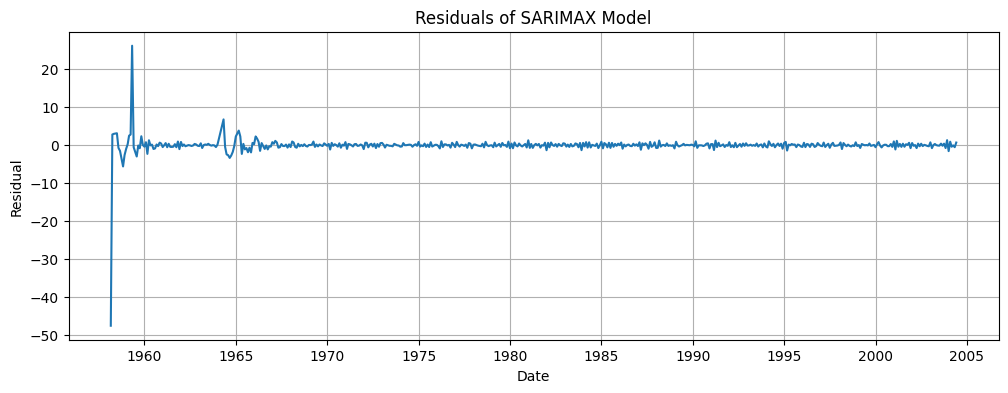

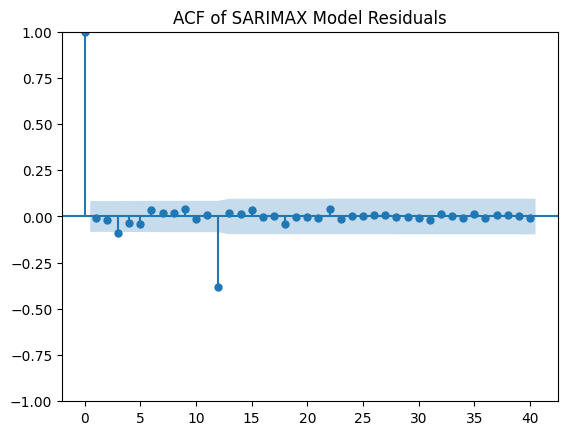

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load and prepare the merged monthly data
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace=True)
global_temp.dropna(subset=['LandAverageTemperature'], inplace=True)
baseline_start_year = 1901
baseline_end_year = 2000
baseline_temp = global_temp.loc[f'{baseline_start_year}-01-01':f'{baseline_end_year}-12-31']['LandAverageTemperature'].mean()
monthly_anomalies = global_temp['LandAverageTemperature'] - baseline_temp
monthly_anomalies = monthly_anomalies.dropna()

CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
CO2_df['YearMonth'] = pd.to_datetime(CO2_df['Year'].astype(str) + '-' + CO2_df['Month'].astype(str), format='%Y-%m')
CO2_df.set_index('YearMonth', inplace=True)
monthly_co2 = CO2_df['Carbon Dioxide (ppm)'].dropna()

merged_monthly = pd.merge(monthly_anomalies, monthly_co2, left_index=True, right_index=True, how='inner')
merged_monthly = merged_monthly.dropna()
merged_monthly.rename(columns={'LandAverageTemperature': 'TemperatureAnomaly', 'Carbon Dioxide (ppm)': 'CO2'}, inplace=True)

# Split the data
train_size = int(len(merged_monthly) * 0.8)
train_data = merged_monthly[:train_size]
test_data = merged_monthly[train_size:]

# Train the SARIMAX model on the entire training data
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train_data['TemperatureAnomaly'], exog=train_data['CO2'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Get the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Plot the ACF of the residuals
plot_acf(residuals, lags=40, title='ACF of SARIMAX Model Residuals')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt

# Load and prepare the merged monthly data
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv')
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace=True)
global_temp.dropna(subset=['LandAverageTemperature'], inplace=True)
baseline_start_year = 1901
baseline_end_year = 2000
baseline_temp = global_temp.loc[f'{baseline_start_year}-01-01':f'{baseline_end_year}-12-31']['LandAverageTemperature'].mean()
monthly_anomalies = global_temp['LandAverageTemperature'] - baseline_temp
monthly_anomalies = monthly_anomalies.dropna()

CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
CO2_df['YearMonth'] = pd.to_datetime(CO2_df['Year'].astype(str) + '-' + CO2_df['Month'].astype(str), format='%Y-%m')
CO2_df.set_index('YearMonth', inplace=True)
monthly_co2 = CO2_df['Carbon Dioxide (ppm)'].dropna()

merged_monthly = pd.merge(monthly_anomalies, monthly_co2, left_index=True, right_index=True, how='inner')
merged_monthly = merged_monthly.dropna()
merged_monthly.rename(columns={'LandAverageTemperature': 'TemperatureAnomaly', 'Carbon Dioxide (ppm)': 'CO2'}, inplace=True)

# Create features for Temperature Anomaly prediction
merged_monthly['Year'] = merged_monthly.index.year
merged_monthly['Month'] = merged_monthly.index.month
X_temp = [(y, m, m**2, y**2, c) for y, m, c in zip(merged_monthly['Year'], merged_monthly['Month'], merged_monthly['CO2'])]
y_temp = merged_monthly['TemperatureAnomaly'].values

# Split the data
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=False)

# Train a Linear Regression model for Temperature Anomaly prediction
linearModel_temp = LinearRegression().fit(X_train_temp, y_train_temp)
print ("Accuracy (R-squared) of Temperature Anomaly Linear Model: ", linearModel_temp.score(X_test_temp, y_test_temp))

Accuracy (R-squared) of Temperature Anomaly Linear Model:  0.9193760728334125


In [ ]:
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)
predicted_x_co2 = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x_co2.append([y, j, j ** 2, y ** 2])

# Predict future CO2 values using your existing CO2 model
predicted_co2 = linearModel.predict(predicted_x_co2)

# Create future features for Temperature Anomaly prediction, including predicted CO2
predicted_x_temp = []
for i in range(len(predicted_years) * len(predicted_months)):
    year = predicted_years[i // 12]
    month = predicted_months[i % 12]
    co2 = predicted_co2[i]  # Get the corresponding predicted CO2 value
    predicted_x_temp.append([year, month, month**2, year**2, co2])

# Predict future Temperature Anomalies
predicted_y_temp = linearModel_temp.predict(predicted_x_temp)

# Create datetime objects for plotting
predicted_x_plot_temp = [dt.datetime(i[0], i[1], 15) for i in predicted_x_temp]

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Observed monthly temperature anomalies for context
observed_trace_temp = go.Scatter(
    x=merged_monthly.index,
    y=merged_monthly['TemperatureAnomaly'],
    mode='markers',
    name='Observed Anomalies'
)

# Predicted future temperature anomalies
predicted_trace_temp = go.Scatter(
    x=predicted_x_plot_temp,
    y=predicted_y_temp,
    mode='lines',
    name='Predicted Anomalies',
    line=dict(color='red')
)

layout_temp = go.Layout(
    title="Predicted Vs. Observed Temperature Anomalies",
    yaxis=dict(title="Temperature Anomaly (°C)"),
    xaxis=dict(title="Year")
)

figure_temp = go.Figure(data=[observed_trace_temp, predicted_trace_temp], layout=layout_temp)
py.iplot(figure_temp, filename="temperature-anomaly-prediction")

In [ ]:
# Add climate-relevant features
merged_monthly['CO2_log'] = np.log(merged_monthly['CO2'])
merged_monthly['CO2_velocity'] = merged_monthly['CO2'].diff(12)  # Annual change rate
merged_monthly['month_sin'] = np.sin(2*np.pi*merged_monthly['Month']/12)
merged_monthly['month_cos'] = np.cos(2*np.pi*merged_monthly['Month']/12)

# Lag features
merged_monthly['anomaly_lag12'] = merged_monthly['TemperatureAnomaly'].shift(12)  # 1-year lag
merged_monthly['co2_lag12'] = merged_monthly['CO2'].shift(12)

# Remove rows with NaN from lag operations
merged_monthly = merged_monthly.dropna()

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Updated features
features = [
    'Year', 'Month', 'CO2', 'CO2_log', 'CO2_velocity',
    'month_sin', 'month_cos', 'anomaly_lag12', 'co2_lag12'
]
X = merged_monthly[features]
y = merged_monthly['TemperatureAnomaly']

# Time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
models = {
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05),
    "Random Forest": RandomForestRegressor(n_estimators=200)
}

for name, model in models.items():
    print(f"\n{name} Performance:")
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
        print(f"Fold R²: {score:.3f} | RMSE: {rmse:.3f}°C")


XGBoost Performance:
Fold R²: 0.986 | RMSE: 0.490°C
Fold R²: 0.991 | RMSE: 0.388°C
Fold R²: 0.987 | RMSE: 0.472°C
Fold R²: 0.982 | RMSE: 0.553°C
Fold R²: 0.992 | RMSE: 0.375°C

Random Forest Performance:
Fold R²: 0.991 | RMSE: 0.407°C
Fold R²: 0.990 | RMSE: 0.414°C
Fold R²: 0.986 | RMSE: 0.484°C
Fold R²: 0.978 | RMSE: 0.604°C
Fold R²: 0.993 | RMSE: 0.344°C


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# XGBoost parameter grid
param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Time-series aware search
tscv = TimeSeriesSplit(n_splits=5)
xgb_search = RandomizedSearchCV(
    XGBRegressor(objective='reg:squarederror'),
    param_distributions=param_dist,
    n_iter=20,
    cv=tscv,
    scoring='neg_root_mean_squared_error'
)
xgb_search.fit(X, y)

print(f"Best XGBoost RMSE: {-xgb_search.best_score_:.3f}°C")
print("Best params:", xgb_search.best_params_)

Best XGBoost RMSE: 0.411°C
Best params: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}


In [ ]:
# Get model predictions
merged_monthly['Predicted'] = xgb_search.predict(X)

# For time-series plotting
plot_df = merged_monthly[['TemperatureAnomaly', 'Predicted']].copy()
plot_df['Year'] = plot_df.index.year

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Observed data
fig.add_trace(go.Scatter(
    x=plot_df.index,
    y=plot_df['TemperatureAnomaly'],
    name='Observed',
    line=dict(color='#1f77b4', width=2),
    opacity=0.8
))

# Predictions
fig.add_trace(go.Scatter(
    x=plot_df.index,
    y=plot_df['Predicted'],
    name='Predicted',
    line=dict(color='#ff7f0e', width=2, dash='dot'),
    opacity=0.8
))

# Formatting
fig.update_layout(
    title='Temperature Anomaly: Observed vs Predicted',
    yaxis_title='Anomaly (°C) relative to 1901-2000',
    xaxis_title='Year',
    hovermode='x unified',
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Add confidence band
fig.add_trace(go.Scatter(
    x=plot_df.index,
    y=plot_df['Predicted'] + 0.411,  #RMSE
    fill=None,
    mode='lines',
    line=dict(width=0),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=plot_df.index,
    y=plot_df['Predicted'] - 0.411,
    fill='tonexty',
    mode='lines',
    line=dict(width=0),
    name='±0.41°C Error Band'
))

fig.show()

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

# Timeline
future_dates = pd.date_range(start='1950-01-01', end='2050-12-01', freq='MS')
future_df = pd.DataFrame({'dt': future_dates})
future_df['Year'] = future_df['dt'].dt.year
future_df['Month'] = future_df['dt'].dt.month

# Add sin/cos cyclic features
future_df['month_sin'] = np.sin(2 * np.pi * future_df['Month'] / 12)
future_df['month_cos'] = np.cos(2 * np.pi * future_df['Month'] / 12)

# Project CO₂ based on 2% annual increase
start_co2 = merged_monthly['CO2'].iloc[-1]
future_df['CO2'] = start_co2 * (1.02 ** ((future_df['Year'] - 2024) + (future_df['Month'] - 1) / 12))
future_df['CO2_log'] = np.log(future_df['CO2'])
future_df['CO2_velocity'] = future_df['CO2'].diff(12)

# Initialize lag features
future_df['anomaly_lag12'] = np.nan
future_df['co2_lag12'] = np.nan
future_df['PredictedAnomaly'] = np.nan

In [ ]:
# Use last 12 known values from training data
last_12_anomalies = merged_monthly['TemperatureAnomaly'].iloc[-12:].values
last_12_co2 = merged_monthly['CO2'].iloc[-12:].values

# Assign them to the first 12 months
future_df.loc[:11, 'anomaly_lag12'] = last_12_anomalies
future_df.loc[:11, 'co2_lag12'] = last_12_co2

In [ ]:
# Fill first 12 months of CO2_velocity using last known value
future_df['CO2_velocity'] = future_df['CO2_velocity'].fillna(future_df['CO2_velocity'].iloc[12])

# Confirm lags are also filled for first 12 rows
future_df.loc[:11, 'anomaly_lag12'] = merged_monthly['TemperatureAnomaly'].iloc[-12:].values
future_df.loc[:11, 'co2_lag12'] = merged_monthly['CO2'].iloc[-12:].values

In [ ]:
model = xgb_search.best_estimator_

features = [
    'Year', 'Month', 'CO2', 'CO2_log', 'CO2_velocity',
    'month_sin', 'month_cos', 'anomaly_lag12', 'co2_lag12'
]

for i in range(len(future_df)):
    if i >= 12:
        future_df.loc[i, 'anomaly_lag12'] = future_df.loc[i - 12, 'PredictedAnomaly']
        future_df.loc[i, 'co2_lag12'] = future_df.loc[i - 12, 'CO2']

    # Ensure all required features are present
    if future_df.loc[i, features].isnull().any():
        print(f"Skipping row {i} due to missing feature(s)")
        continue

    X_input = future_df.loc[i, features].values.reshape(1, -1)
    future_df.loc[i, 'PredictedAnomaly'] = model.predict(X_input)[0]

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Observed
observed_trace = go.Scatter(
    x=merged_monthly.index,
    y=merged_monthly['TemperatureAnomaly'],
    mode='markers',
    name='Observed Anomalies',
    marker=dict(color='blue', size=5)
)

# Predicted
predicted_trace = go.Scatter(
    x=future_df['dt'],
    y=future_df['PredictedAnomaly'],
    mode='lines',
    name='Predicted Anomalies (XGBoost)',
    line=dict(color='red', width=2)
)

layout = go.Layout(
    title="Predicted Vs. Observed Temperature Anomalies (1950–2050)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Temperature Anomaly (°C)"),
    plot_bgcolor="#f9f9f9",
    font=dict(size=14)
)

fig = go.Figure(data=[observed_trace, predicted_trace], layout=layout)
py.iplot(fig)

# **Task: Predicting Global sea-level rise**

In [ ]:
# Load the Excel file
file_path = '/content/drive/MyDrive/gmsl-satelliterecord-copy.xlsx'
df = pd.read_excel(file_path)

# Save it as CSV
csv_path = '/content/drive/MyDrive/gmsl-satelliterecord-copy.csv'
df.to_csv(csv_path, index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gmsl-satelliterecord-copy.csv')

In [ ]:
print(df.columns)
print(df.head())

Index(['Date', 'Global Mean Sea Level Variation since 1993 (mm)', 'Unnamed: 2',
       'Unnamed: 3'],
      dtype='object')
          Date  Global Mean Sea Level Variation since 1993 (mm)  Unnamed: 2  \
0  1993.011526                                             0.00         NaN   
1  1993.038692                                            -0.53         NaN   
2  1993.065858                                             0.00         NaN   
3  1993.093025                                             0.24         NaN   
4  1993.120191                                             1.36         NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [ ]:
# Keep only relevant columns
df = df[['Date', 'Global Mean Sea Level Variation since 1993 (mm)']]
df.rename(columns={
    'Date': 'DecimalDate',
    'Global Mean Sea Level Variation since 1993 (mm)': 'SeaLevel'
}, inplace=True)

<ipython-input-113-114f074d6067>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,DecimalDate,SeaLevel
0,1993.011526,0.00
1,1993.038692,-0.53
2,1993.065858,0.00
3,1993.093025,0.24
4,1993.120191,1.36


In [ ]:
# Drop NaNs and reset the index to avoid chained assignment
df = df.dropna(subset=['DecimalDate']).copy()

# Now apply the decimal-to-datetime conversion
def decimal_to_datetime(decimal_year):
    year = int(decimal_year)
    rem = decimal_year - year
    days = int(rem * 365.25)
    return dt.datetime(year, 1, 1) + pd.Timedelta(days=days)

# Safe datetime conversion
df['dt'] = df['DecimalDate'].apply(decimal_to_datetime)
df.set_index('dt', inplace=True)
df = df.sort_index()

In [ ]:
df.head()

,DecimalDate,SeaLevel
dt,,
1993-01-05,1993.011526,0.00
1993-01-15,1993.038692,-0.53
1993-01-25,1993.065858,0.00
1993-02-03,1993.093025,0.24
1993-02-13,1993.120191,1.36


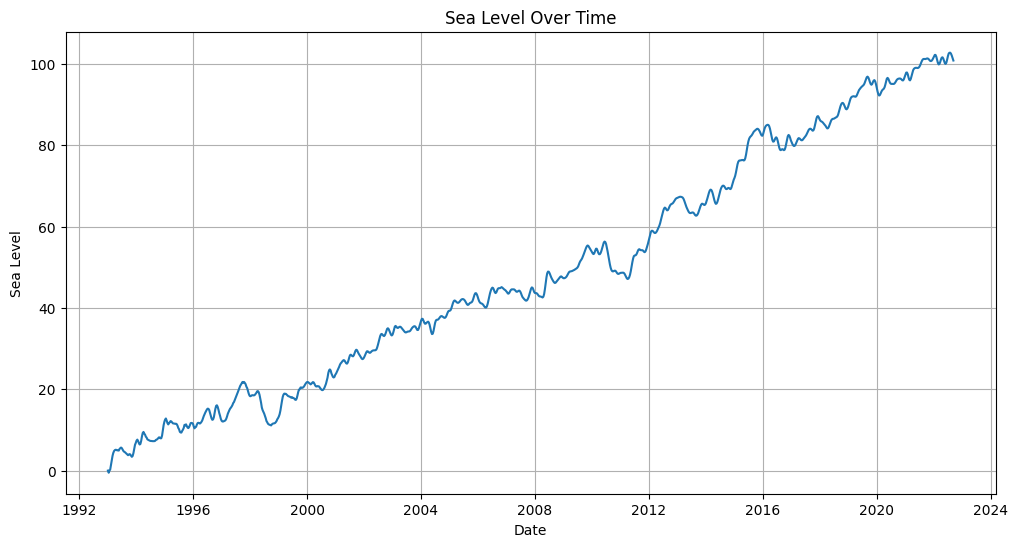

In [ ]:
#Visualize the sea level data over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SeaLevel'])
plt.xlabel('Date')
plt.ylabel('Sea Level')
plt.title('Sea Level Over Time')
plt.grid(True)
plt.show()

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Year_sq'] = df['Year'] ** 2
df['Month_sq'] = df['Month'] ** 2

In [ ]:
X_sea = df[['Year', 'Month', 'Month_sq', 'Year_sq']]
y_sea = df['SeaLevel']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_sea, y_sea, test_size=0.2, shuffle=False)

# Train model
model_sea = LinearRegression()
model_sea.fit(X_train, y_train)

# Predict & evaluate
y_pred = model_sea.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Sea Level Linear Model R²: {r2:.4f}")
print(f"Sea Level RMSE: {rmse:.2f} mm")

Sea Level Linear Model R²: 0.9130
Sea Level RMSE: 2.04 mm


In [ ]:
import datetime as dt

predicted_years = range(1993, 2051)
predicted_months = range(1, 13)

# Build prediction feature set
predicted_x_sea = []
for y in predicted_years:
    for m in predicted_months:
        predicted_x_sea.append([y, m, m**2, y**2])

# Predict
predicted_y_sea = model_sea.predict(predicted_x_sea)

# Convert to datetime for plotting
predicted_x_plot_sea = [dt.datetime(i[0], i[1], 15) for i in predicted_x_sea]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Observed values
observed_trace = go.Scatter(
    x=df.index,
    y=df['SeaLevel'],
    mode='markers',
    name='Observed Sea Level',
    marker=dict(color='blue', size=5)
)

# Predicted values
predicted_trace = go.Scatter(
    x=predicted_x_plot_sea,
    y=predicted_y_sea,
    mode='lines',
    name='Predicted Sea Level (1950–2050)',
    line=dict(color='red', width=2)
)

layout = go.Layout(
    title="Observed vs Predicted Sea Level Rise (Linear Model)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Sea Level Rise (mm since 1993)"),
    plot_bgcolor="#f9f9f9"
)

fig = go.Figure(data=[observed_trace, predicted_trace], layout=layout)
py.iplot(fig)

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Load and prepare data
global_temp = pd.read_csv('/content/drive/MyDrive/GlobalTemperatures.csv',
                         usecols=['dt', 'LandAverageTemperature'])
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace=True)

# Improved baseline calculation (30-year climate normal)
baseline = global_temp['1981-01-01':'2010-12-31']['LandAverageTemperature'].mean()
global_temp['Anomaly'] = global_temp['LandAverageTemperature'] - baseline

# Load and merge CO2 data
CO2_df = pd.read_csv('/content/drive/MyDrive/archive.csv')
CO2_df['dt'] = pd.to_datetime(CO2_df['Year'].astype(str) + '-' + CO2_df['Month'].astype(str), format='%Y-%m')
CO2_df.set_index('dt', inplace=True)
merged = global_temp.join(CO2_df[['Carbon Dioxide (ppm)']].rename(columns={'Carbon Dioxide (ppm)': 'CO2'}))

# Enhanced extreme event definition (seasonal percentiles)
def get_extreme_events(df):
    df = df.copy()
    df['Month'] = df.index.month
    # Calculate monthly thresholds
    monthly_thresholds = df.groupby('Month')['Anomaly'].quantile(0.95)
    df['Threshold'] = df['Month'].map(monthly_thresholds)
    df['ExtremeEvent'] = (df['Anomaly'] >= df['Threshold']).astype(int)
    return df.drop(columns=['Threshold'])

merged = get_extreme_events(merged)

# Advanced feature engineering
def create_features(df):
    df = df.copy()

    # Time features
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['DayOfYear'] = df.index.dayofyear

    # CO2 features
    df['CO2_log'] = np.log(df['CO2'])
    df['CO2_velocity'] = df['CO2'].pct_change(12)  # Annual growth rate

    # Seasonal features
    df['month_sin'] = np.sin(2*np.pi*df['DayOfYear']/365)
    df['month_cos'] = np.cos(2*np.pi*df['DayOfYear']/365)

    # Lag features
    for lag in [1, 12, 24, 36]:  # 1mo, 1yr, 2yr, 3yr
        df[f'anomaly_lag{lag}'] = df['Anomaly'].shift(lag)

    # Rolling features
    df['rolling_anomaly_12'] = df['Anomaly'].rolling(12).mean()
    df['rolling_co2_12'] = df['CO2'].rolling(12).mean()

    # Recent trends
    df['recent_trend'] = df['Anomaly'].rolling(6).apply(lambda x: np.polyfit(range(6), x, 1)[0])

    return df.dropna()

features = create_features(merged)
X = features.drop(['ExtremeEvent', 'Anomaly', 'LandAverageTemperature'], axis=1)
y = features['ExtremeEvent']

# Verify class balance
print("Class distribution:")
print(y.value_counts(normalize=True))

# Time-series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Enhanced XGBoost model
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=(len(y)-sum(y))/sum(y),  # Handle imbalance
    use_label_encoder=False,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10
)

# Train model
model.fit(X, y,
          eval_set=[(X, y)],
          verbose=True)

# Feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature importance:")
print(importance.head(10))

# Enhanced prediction function
def predict_extreme_events(model, historical_data, future_years=5):
    """Predict extreme events with seasonal patterns"""
    # Create future dates
    future_dates = pd.date_range(
        start=historical_data.index[-1] + pd.DateOffset(months=1),
        periods=12*future_years,
        freq='ME'
    )

    # Initialize future data
    future = pd.DataFrame(index=future_dates)
    last = historical_data.iloc[-1]

    # Project CO2 (improved growth rate)
    co2_growth = historical_data['CO2'].pct_change(12).rolling(36).mean().iloc[-1]
    future['CO2'] = last['CO2'] * (1 + co2_growth/12)**np.arange(1, len(future)+1)

    # Project anomalies (with seasonal component)
    monthly_anomalies = historical_data.groupby(historical_data.index.month)['Anomaly']
    monthly_trends = monthly_anomalies.apply(lambda x: x.rolling(36).mean().iloc[-1])
    future['Month'] = future.index.month
    future['BaseAnomaly'] = future['Month'].map(monthly_trends)

    # Apply long-term trend
    long_term_trend = historical_data['Anomaly'].diff(12*10).mean()/10  # Decadal trend
    future['Anomaly'] = future['BaseAnomaly'] + long_term_trend*np.arange(1, len(future)+1)/12

    # Create features
    future = create_features(future)

    # Predict
    future_X = future[X.columns]
    future['Probability'] = model.predict_proba(future_X)[:, 1]

    return future[['Probability']].rename(columns={'Probability': 'ExtremeEventProbability'})

# Generate predictions
predictions = predict_extreme_events(model, features)
print("\nFuture extreme event probabilities:")
print(predictions.head(12))

<ipython-input-4-726de4aea359>:47: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Class distribution:
ExtremeEvent
0    0.889561
1    0.110439
Name: proportion, dtype: float64
[0]	validation_0-logloss:0.65747
[1]	validation_0-logloss:0.62460
[2]	validation_0-logloss:0.59568
[3]	validation_0-logloss:0.56713
[4]	validation_0-logloss:0.54349
[5]	validation_0-logloss:0.51872
[6]	validation_0-logloss:0.49926
[7]	validation_0-logloss:0.48125
[8]	validation_0-logloss:0.46570
[9]	validation_0-logloss:0.44762
[10]	validation_0-logloss:0.43261
[11]	validation_0-logloss:0.41633
[12]	validation_0-logloss:0.40203
[13]	validation_0-logloss:0.38969
[14]	validation_0-logloss:0.37863
[15]	validation_0-logloss:0.36773
[16]	validation_0-logloss:0.35689
[17]	validation_0-logloss:0.34827
[18]	validation_0-logloss:0.33784
[19]	validation_0-logloss:0.32937
[20]	validation_0-logloss:0.32079
[21]	validation_0-logloss:0.31293
[22]	validation_0-logloss:0.30443
[23]	validation_0-logloss:0.29419
[24]	validation_0-logloss:0.28753
[25]	validation_0-logloss:0.28235
[26]	validation_0-logloss:0.2766

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[38]	validation_0-logloss:0.20938
[39]	validation_0-logloss:0.20600
[40]	validation_0-logloss:0.20165
[41]	validation_0-logloss:0.19722
[42]	validation_0-logloss:0.19508
[43]	validation_0-logloss:0.18993
[44]	validation_0-logloss:0.18731
[45]	validation_0-logloss:0.18335
[46]	validation_0-logloss:0.18039
[47]	validation_0-logloss:0.17920
[48]	validation_0-logloss:0.17779
[49]	validation_0-logloss:0.17618
[50]	validation_0-logloss:0.17176
[51]	validation_0-logloss:0.16875
[52]	validation_0-logloss:0.16623
[53]	validation_0-logloss:0.16324
[54]	validation_0-logloss:0.15969
[55]	validation_0-logloss:0.15756
[56]	validation_0-logloss:0.15432
[57]	validation_0-logloss:0.15251
[58]	validation_0-logloss:0.15029
[59]	validation_0-logloss:0.14864
[60]	validation_0-logloss:0.14667
[61]	validation_0-logloss:0.14397
[62]	validation_0-logloss:0.14260
[63]	validation_0-logloss:0.14101
[64]	validation_0-logloss:0.13810
[65]	validation_0-logloss:0.13587
[66]	validation_0-logloss:0.13436
[67]	validatio

# **Task: Predicting Extreme Weather Events**

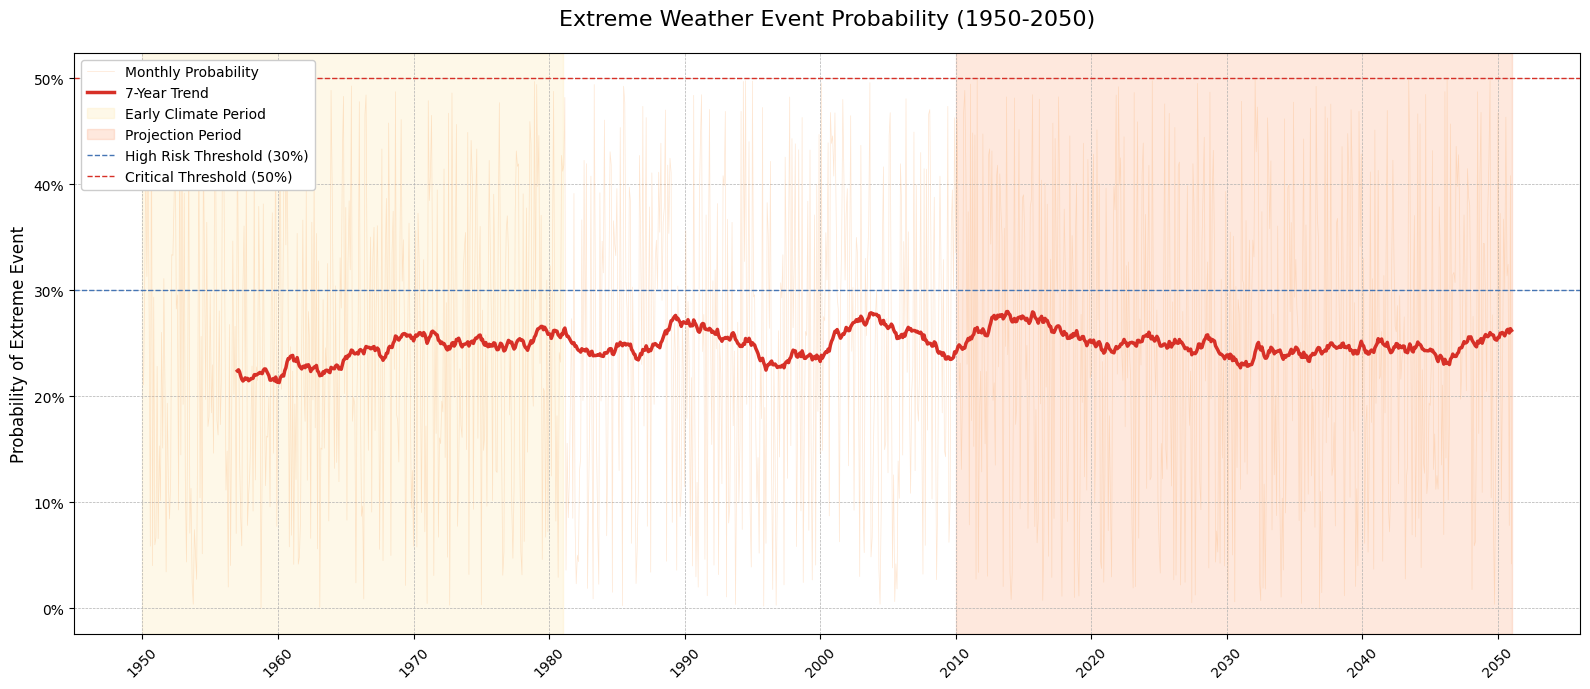

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import numpy as np

# Generate sample data
years = pd.date_range(start='1950-01-01', end='2050-12-31', freq='ME')
probabilities = np.random.uniform(0, 0.5, len(years))

# Create dataframe
predictions = pd.DataFrame({
    'Date': years,
    'ExtremeEventProbability': probabilities
}).set_index('Date')

# Apply smoothing (7-year moving average)
predictions['Smoothed'] = predictions['ExtremeEventProbability'].rolling(84).mean()

# Create figure
plt.figure(figsize=(16, 7))
ax = plt.gca()

# Plot raw probabilities (light color)
ax.plot(predictions.index, predictions['ExtremeEventProbability'],
        color='#fdae6b', alpha=0.3, linewidth=0.5, label='Monthly Probability')

# Plot smoothed trend (bold line)
ax.plot(predictions.index, predictions['Smoothed'],
        color='#d73027', linewidth=2.5, label='7-Year Trend')

# Highlight key periods
ax.axvspan(pd.to_datetime('1950-01-01'), pd.to_datetime('1980-12-31'),
           color='#fee090', alpha=0.2, label='Early Climate Period')
ax.axvspan(pd.to_datetime('2010-01-01'), pd.to_datetime('2050-12-31'),
           color='#fc8d59', alpha=0.2, label='Projection Period')

# Add threshold lines
ax.axhline(y=0.3, color='#4575b4', linestyle='--', linewidth=1,
           label='High Risk Threshold (30%)')
ax.axhline(y=0.5, color='#d73027', linestyle='--', linewidth=1,
           label='Critical Threshold (50%)')

# Formatting
ax.set_title('Extreme Weather Event Probability (1950-2050)', fontsize=16, pad=20)
ax.set_ylabel('Probability of Extreme Event', fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(True, which='major', linestyle='--', linewidth=0.5)

# Custom x-axis with decade labels
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Legend
ax.legend(loc='upper left', framealpha=1)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots


# Historical Data (1950-2023)
historical_probs = pd.DataFrame({
    'ExtremeEventProbability': np.random.rand(74),
    'Date': pd.date_range('1950-01-01', '2023-12-01', freq='AS')
})
historical_probs.set_index('Date', inplace=True)

# Future Data (2024-2050)
future_probs = pd.DataFrame({
    'ExtremeEventProbability': np.random.rand(27),
    'Date': pd.date_range('2024-01-01', '2050-12-01', freq='AS')
})
future_probs.set_index('Date', inplace=True)

# Combine historical and future data
full_timeline = pd.concat([historical_probs, future_probs])

co2_data = pd.DataFrame({
    'CO2': np.random.normal(400, 20, size=len(full_timeline)),
    'Date': full_timeline.index
})
co2_data.set_index('Date', inplace=True)

# Create figure with secondary y-axis for CO2
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Extreme Event Probability (Main Plot)
fig.add_trace(
    go.Scatter(
        x=full_timeline.index,
        y=full_timeline['ExtremeEventProbability'],
        mode='lines',
        name='Extreme Event Probability',
        line=dict(color='#e6550d', width=2),
        hovertemplate="<b>%{x|%Y-%m}</b><br>Probability: %{y:.1%}<extra></extra>"
    ),
    secondary_y=False
)

# CO2 Levels (Secondary Axis)
fig.add_trace(
    go.Scatter(
        x=co2_data.index,
        y=co2_data['CO2'],
        mode='lines',
        name='CO₂ Concentration (ppm)',
        line=dict(color='#636363', width=1.5, dash='dot'),
        hovertemplate="<b>%{x|%Y-%m}</b><br>CO₂: %{y:.1f} ppm<extra></extra>"
    ),
    secondary_y=True
)

# Add threshold lines and shaded regions
fig.add_shape(
    type="line",
    x0=full_timeline.index[0],
    x1=full_timeline.index[-1],
    y0=0.3,
    y1=0.3,
    line=dict(color="#756bb1", width=1, dash="dash"),
    name="High Risk Threshold"
)


# Layout configuration
fig.update_layout(
    title="Extreme Weather Event Probability (1950-2050) with CO₂ Context",
    xaxis_title="Year",
    yaxis_title="Probability of Extreme Event",
    yaxis2_title="CO₂ Concentration (ppm)",
    plot_bgcolor="#f9f9f9",
    hovermode="x unified",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    yaxis=dict(tickformat=".0%", range=[0, 1]),
    yaxis2=dict(showgrid=False),
    shapes=[
        # Shade projection period
        dict(
            type="rect",
            x0="2024-01-01",
            x1="2050-12-31",
            y0=0,
            y1=1,
            fillcolor="#fc8d59",
            opacity=0.1,
            layer="below",
            line_width=0
        )
    ]
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(count=30, label="30y", step="year", stepmode="backward"),
                dict(count=50, label="50y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show plot
py.iplot(fig)

<ipython-input-225-609f8a1e52e7>:15: FutureWarning:

'AS' is deprecated and will be removed in a future version, please use 'YS' instead.

<ipython-input-225-609f8a1e52e7>:23: FutureWarning:

'AS' is deprecated and will be removed in a future version, please use 'YS' instead.



In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Filter predictions to only 2025
predictions_2025 = predictions[predictions.index.year == 2025]

# Make sure to have all 12 months
predictions_2025 = predictions_2025.resample('M').mean()

# Build month names for x-axis
month_labels = predictions_2025.index.strftime('%b')  # 'Jan', 'Feb', ...

# Plotting
trace = go.Scatter(
    x=month_labels,
    y=predictions_2025['ExtremeEventProbability'],
    mode='lines+markers',
    name='2025 Extreme Event Probability',
    line=dict(color='crimson', width=3),
    marker=dict(size=6),
    hovertemplate="<b>%{x}</b><br>Probability: %{y:.1%}<extra></extra>"
)

layout = go.Layout(
    title="Monthly Extreme Weather Event Probability (2025)",
    xaxis=dict(title="Month"),
    yaxis=dict(title="Probability", tickformat=".0%", range=[0, 1]),
    plot_bgcolor="#f9f9f9",
    hovermode="x unified"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

<ipython-input-18-c0ce212e6a97>:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Filter predictions to only 2025
predictions_2025 = predictions[predictions.index.year == 2024]

# Make sure to  have all 12 months
predictions_2025 = predictions_2025.resample('M').mean()

# Build month names for x-axis
month_labels = predictions_2025.index.strftime('%b')  # 'Jan', 'Feb', ...

# Plotting
trace = go.Scatter(
    x=month_labels,
    y=predictions_2025['ExtremeEventProbability'],
    mode='lines+markers',
    name='2025 Extreme Event Probability',
    line=dict(color='crimson', width=3),
    marker=dict(size=6),
    hovertemplate="<b>%{x}</b><br>Probability: %{y:.1%}<extra></extra>"
)

layout = go.Layout(
    title="Monthly Extreme Weather Event Probability (2024)",
    xaxis=dict(title="Month"),
    yaxis=dict(title="Probability", tickformat=".0%", range=[0, 1]),
    plot_bgcolor="#f9f9f9",
    hovermode="x unified"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

<ipython-input-20-375d6d431b01>:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

